# Practice Case 05 -  Supervised Learning

Given the train.csv and test.csv, perform the following actions.

1. Create classifiers from train.csv data, in order to predict att10 as label based on the
rest of the attributes. Use at least 5 algorithms (k-NN, Decision Tree, Logistic
Regression, Voting, Averaging, Bagging, Random Forest, Averaging, Voting, AdaBoost,
XGBoost, LightGBM, CatBoost, or Stacking). Use AUC for your model evaluation
performance.
Submit your .ipynb file that contains your coding process in creating classifiers.

2. Choose the best Classifier based on highest AUC and use it for predicting the test.csv
data.
Submit your .csv file that contains the prediction of test.csv data. Sample of prediction
can be found in sample_prediction.csv file.

In [74]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn import datasets
from sklearn.model_selection import train_test_split

from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from xgboost import XGBClassifier
import lightgbm as lgb
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from mlxtend.classifier import StackingClassifier

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

In [2]:
train = pd.read_csv('dataset/train.csv')

In [3]:
test = pd.read_csv('dataset/test.csv')

In [4]:
sample = pd.read_csv('dataset/sample_prediction.csv')

In [5]:
train.head()

,att1,att2,att3,att4,att5,att6,att7,att8a,att8b,att8c,...,att8e,att8f,att8g,att8h,att8i,att8j,att9a,att9b,att9c,att10
0,0.16,0.82,6,202,4,1,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0.43,0.48,2,153,3,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1
2,0.39,0.54,2,127,3,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1
3,0.73,1.00,5,253,6,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1
4,0.44,0.46,2,149,3,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1


In [6]:
train.shape

(8000, 21)

In [7]:
test.shape

(2000, 20)

In [40]:
sample.head()

,no,prediction_for_class_1
0,1,0.1
1,2,0.1
2,3,0.1
3,4,0.1
4,5,0.1


In [9]:
X = train.iloc[:,0:len(train.columns)-1]
y = train.iloc[:,len(train.columns)-1]
X = preprocessing.normalize(X)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
X_train.shape

(5600, 20)

# Model 1: Logistic Regression

In [11]:
# from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

C:\Users\mikhael.bratanata\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [12]:
lr_auc = roc_auc_score(y_test, lr.predict(X_test))
print(roc_auc_score(y_test, lr.predict(X_test)))

0.5


# Model 2: k-Nearest Neighbors

In [13]:
# from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(50)

knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [14]:
knn_auc = roc_auc_score(y_test, knn.predict(X_test))
print(roc_auc_score(y_test, knn.predict(X_test)))

0.8406477116867147


# Model 3: Decision Tree

In [15]:
# from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

In [16]:
dt_auc = roc_auc_score(y_test, dt.predict(X_test))
print(roc_auc_score(y_test, dt.predict(X_test)))

0.9565590957102994


# Model 4: Voting

In [17]:
# from sklearn.ensemble import VotingClassifier
voting = VotingClassifier(estimators=[('knn', knn), ('dt', dt), ('lr', lr)])

voting.fit(X_train, y_train)
y_pred = voting.predict(X_test)

C:\Users\mikhael.bratanata\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [18]:
voting_auc = roc_auc_score(y_test, voting.predict(X_test))
print(roc_auc_score(y_test, voting.predict(X_test)))

0.8669282369819173


# Model 5: Averaging

In [19]:
# from sklearn.ensemble import VotingClassifier
avg = VotingClassifier(estimators=[('knn', knn), ('dt', dt), ('lr', lr)], voting='soft', weights=[1,1,2])

avg.fit(X_train, y_train)
y_pred = avg.predict(X_test)

C:\Users\mikhael.bratanata\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [20]:
avg_auc = roc_auc_score(y_test, avg.predict(X_test))
print(roc_auc_score(y_test, avg.predict(X_test)))

0.8669282369819173


# Model 6: Bagging

#### Model 6.1.: k-Nearest Neighbors

In [21]:
# from sklearn.ensemble import BaggingClassifier
bagging_knn = BaggingClassifier(KNeighborsClassifier(), max_samples=0.5, max_features=0.5)

bagging_knn.fit(X_train, y_train)
y_pred = bagging_knn.predict(X_test)

In [22]:
bagging_knn_auc = roc_auc_score(y_test, bagging_knn.predict(X_test))
print(roc_auc_score(y_test, bagging_knn.predict(X_test)))

0.9222225725591588


#### Model 6.2.: Decision Tree

In [23]:
# from sklearn.ensemble import BaggingClassifier
bagging_dt = BaggingClassifier(DecisionTreeClassifier(), max_samples=0.5, max_features=0.5)

bagging_dt.fit(X_train, y_train)
y_pred = bagging_dt.predict(X_test)

In [24]:
bagging_dt_auc = roc_auc_score(y_test, bagging_dt.predict(X_test))
print(roc_auc_score(y_test, bagging_dt.predict(X_test)))

0.9311318598161781


# Model 7: Random Forest

In [25]:
# from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

C:\Users\mikhael.bratanata\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [26]:
rf_auc = roc_auc_score(y_test, rf.predict(X_test))
print(roc_auc_score(y_test, rf.predict(X_test)))

0.951474830918636


# Model 8: AdaBoost

In [27]:
# from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=500, learning_rate=1)

ada.fit(X_train, y_train)
y_pred = ada.predict(X_test)

In [28]:
ada_auc = roc_auc_score(y_test, ada.predict(X_test))
print(roc_auc_score(y_test, ada.predict(X_test)))

0.932361542463464


# Model 9: GradientBoost

In [29]:
# from sklearn.ensemble import GradientBoostingClassifier
gradient = GradientBoostingClassifier(n_estimators=500, learning_rate=1)

gradient.fit(X_train, y_train)
y_pred = gradient.predict(X_test)

In [30]:
gradient_auc = roc_auc_score(y_test, gradient.predict(X_test))
print(roc_auc_score(y_test, gradient.predict(X_test)))

0.961148728539673


# Model 10: XGBoost

In [31]:
# import xgboost as xgb
# from xgboost import XGBClassifier
xgb = XGBClassifier(learning_rate = 0.9, max_depth = 5, n_estimators = 500)

xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

In [32]:
xgb_auc = roc_auc_score(y_test, xgb.predict(X_test))
print(roc_auc_score(y_test, xgb.predict(X_test)))

0.966380791726443


# Model 11: Light GBM

In [44]:
# import lightgbm as lgb
# from lightgbm import LGBMClassifier
lgb = LGBMClassifier()

lgb.fit(X_train,y_train)
y_pred = lgb.predict(X_test)

In [34]:
lgb_auc = roc_auc_score(y_test, lgb.predict(X_test))
print(roc_auc_score(y_test, lgb.predict(X_test)))

0.9678331572890227


# Model 12: CatBoost

In [35]:
# from catboost import CatBoostClassifier
cat = CatBoostClassifier(n_estimators=500, learning_rate=1)

cat.fit(X_train,y_train)
y_pred = cat.predict(X_test)

0:	learn: 0.2422399	total: 68.6ms	remaining: 34.2s
1:	learn: 0.1957209	total: 79.4ms	remaining: 19.8s
2:	learn: 0.1727396	total: 89.9ms	remaining: 14.9s
3:	learn: 0.1537484	total: 100ms	remaining: 12.4s
4:	learn: 0.1468289	total: 111ms	remaining: 10.9s
5:	learn: 0.1303913	total: 122ms	remaining: 10s
6:	learn: 0.1265410	total: 132ms	remaining: 9.29s
7:	learn: 0.1217985	total: 142ms	remaining: 8.72s
8:	learn: 0.1117808	total: 152ms	remaining: 8.3s
9:	learn: 0.1092288	total: 162ms	remaining: 7.95s
10:	learn: 0.1030083	total: 172ms	remaining: 7.67s
11:	learn: 0.0921995	total: 183ms	remaining: 7.44s
12:	learn: 0.0850101	total: 193ms	remaining: 7.23s
13:	learn: 0.0808991	total: 204ms	remaining: 7.08s
14:	learn: 0.0799975	total: 215ms	remaining: 6.94s
15:	learn: 0.0769465	total: 225ms	remaining: 6.81s
16:	learn: 0.0706076	total: 235ms	remaining: 6.69s
17:	learn: 0.0681232	total: 245ms	remaining: 6.57s
18:	learn: 0.0626993	total: 257ms	remaining: 6.51s
19:	learn: 0.0581152	total: 271ms	remaini

167:	learn: 0.0031687	total: 2.11s	remaining: 4.17s
168:	learn: 0.0031666	total: 2.12s	remaining: 4.15s
169:	learn: 0.0031659	total: 2.15s	remaining: 4.17s
170:	learn: 0.0031546	total: 2.16s	remaining: 4.16s
171:	learn: 0.0031480	total: 2.18s	remaining: 4.15s
172:	learn: 0.0031457	total: 2.19s	remaining: 4.13s
173:	learn: 0.0031445	total: 2.19s	remaining: 4.11s
174:	learn: 0.0031433	total: 2.21s	remaining: 4.09s
175:	learn: 0.0031386	total: 2.22s	remaining: 4.09s
176:	learn: 0.0031370	total: 2.23s	remaining: 4.07s
177:	learn: 0.0031038	total: 2.24s	remaining: 4.05s
178:	learn: 0.0030909	total: 2.25s	remaining: 4.04s
179:	learn: 0.0030825	total: 2.26s	remaining: 4.02s
180:	learn: 0.0030811	total: 2.27s	remaining: 4s
181:	learn: 0.0030802	total: 2.28s	remaining: 3.99s
182:	learn: 0.0030740	total: 2.3s	remaining: 3.98s
183:	learn: 0.0030549	total: 2.31s	remaining: 3.97s
184:	learn: 0.0030084	total: 2.33s	remaining: 3.96s
185:	learn: 0.0030010	total: 2.35s	remaining: 3.96s
186:	learn: 0.00

336:	learn: 0.0022832	total: 3.9s	remaining: 1.88s
337:	learn: 0.0022803	total: 3.91s	remaining: 1.87s
338:	learn: 0.0022760	total: 3.92s	remaining: 1.86s
339:	learn: 0.0022689	total: 3.92s	remaining: 1.85s
340:	learn: 0.0022678	total: 3.93s	remaining: 1.83s
341:	learn: 0.0022651	total: 3.94s	remaining: 1.82s
342:	learn: 0.0022640	total: 3.95s	remaining: 1.81s
343:	learn: 0.0022548	total: 3.96s	remaining: 1.8s
344:	learn: 0.0022493	total: 3.97s	remaining: 1.78s
345:	learn: 0.0022416	total: 3.98s	remaining: 1.77s
346:	learn: 0.0022379	total: 3.99s	remaining: 1.76s
347:	learn: 0.0022375	total: 4s	remaining: 1.75s
348:	learn: 0.0022368	total: 4.01s	remaining: 1.73s
349:	learn: 0.0022357	total: 4.02s	remaining: 1.72s
350:	learn: 0.0022315	total: 4.03s	remaining: 1.71s
351:	learn: 0.0022302	total: 4.04s	remaining: 1.7s
352:	learn: 0.0022295	total: 4.04s	remaining: 1.68s
353:	learn: 0.0022281	total: 4.06s	remaining: 1.67s
354:	learn: 0.0022275	total: 4.07s	remaining: 1.66s
355:	learn: 0.0022

In [36]:
cat_auc = roc_auc_score(y_test, cat.predict(X_test))
print(roc_auc_score(y_test, cat.predict(X_test)))

0.9617537166369756


# Model 13: Stacking

In [38]:
# from mlxtend.classifier import StackingClassifier
stack = StackingClassifier( classifiers=[dt, rf, bagging_dt],
                            meta_classifier = LogisticRegression(),
                            use_probas = False,
                            use_features_in_secondary = False)

stack.fit(X_train, y_train)
y_pred = stack.predict(X_test)

C:\Users\mikhael.bratanata\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [39]:
stack_auc = roc_auc_score(y_test, stack.predict(X_test))
print(roc_auc_score(y_test, stack.predict(X_test)))

0.9567640428181803


In [41]:
print('Model 1: LR AUC = ', lr_auc)
print('Model 2: KNN AUC = ', knn_auc)
print('Model 3: DT AUC = ', dt_auc)
print('Model 4: Voting AUC = ', voting_auc)
print('Model 5: Averaging AUC = ', avg_auc)
print('Model 6.1.: Bagging KNN AUC = ', bagging_knn_auc)
print('Model 6.2.: Bagging DT AUC = ', bagging_dt_auc)
print('Model 7: RF AUC = ', rf_auc)
print('Model 8: AdaBoost AUC = ', ada_auc)
print('Model 9: GradientBoost AUC = ', gradient_auc)
print('Model 10: XGBoost AUC = ', xgb_auc)
print('Model 11: LightGBM AUC = ', lgb_auc)
print('Model 12: CatBoost AUC = ', cat_auc)
print('Model 13: Stacking AUC = ', stack_auc)

Model 1: LR AUC =  0.5
Model 2: KNN AUC =  0.8406477116867147
Model 3: DT AUC =  0.9565590957102994
Model 4: Voting AUC =  0.8669282369819173
Model 5: Averaging AUC =  0.8669282369819173
Model 6.1.: Bagging KNN AUC =  0.9222225725591588
Model 6.2.: Bagging DT AUC =  0.9311318598161781
Model 7: RF AUC =  0.951474830918636
Model 8: AdaBoost AUC =  0.932361542463464
Model 9: GradientBoost AUC =  0.961148728539673
Model 10: XGBoost AUC =  0.966380791726443
Model 11: LightGBM AUC =  0.9678331572890227
Model 12: CatBoost AUC =  0.9617537166369756
Model 13: Stacking AUC =  0.9567640428181803


*__The best model with the highest AUC is Light GBM with AUC of 0.9678.__*

In [59]:
X_val = preprocessing.normalize(test.copy())

In [60]:
def lgb_model(X_train, y_train, X_test, y_test, X_val):
    np.random.seed(42)
    train_data = lgb.Dataset(X_train, label=y_train)
    test_data = lgb.Dataset(X_test, label=y_test)

    parameters = {
        'application': 'binary',
        'objective': 'binary',
        'metric': 'auc',
        'is_unbalance': 'true',
        'boosting': 'gbdt',
        'num_leaves': 31,
        'feature_fraction': 0.5,
        'bagging_fraction': 0.5,
        'bagging_freq': 20,
        'learning_rate': 0.05,
        'verbose': 0
    }

    lgb_model = lgb.train(parameters,
                           train_data,
                           valid_sets=test_data,
                           num_boost_round=5000,
                           early_stopping_rounds=100)

    y_pred = lgb_model.predict(X_val)
    predictions = [round(value) for value in y_pred]
    test['prob'] = y_pred
    test['result'] = predictions
    return y_pred, predictions

In [64]:
lgb_model(X_train, y_train, X_test, y_test, X_val)

[1]	valid_0's auc: 0.916657
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.96343
[3]	valid_0's auc: 0.971556
[4]	valid_0's auc: 0.973391
[5]	valid_0's auc: 0.974796
[6]	valid_0's auc: 0.975173
[7]	valid_0's auc: 0.975375
[8]	valid_0's auc: 0.976234
[9]	valid_0's auc: 0.97606
[10]	valid_0's auc: 0.975397
[11]	valid_0's auc: 0.974284
[12]	valid_0's auc: 0.976222
[13]	valid_0's auc: 0.976596
[14]	valid_0's auc: 0.976421
[15]	valid_0's auc: 0.976107
[16]	valid_0's auc: 0.976937
[17]	valid_0's auc: 0.977678
[18]	valid_0's auc: 0.977054
[19]	valid_0's auc: 0.977759
[20]	valid_0's auc: 0.97758
[21]	valid_0's auc: 0.977817
[22]	valid_0's auc: 0.978278
[23]	valid_0's auc: 0.978151
[24]	valid_0's auc: 0.979168
[25]	valid_0's auc: 0.979212
[26]	valid_0's auc: 0.979218
[27]	valid_0's auc: 0.979203
[28]	valid_0's auc: 0.978984
[29]	valid_0's auc: 0.980028
[30]	valid_0's auc: 0.979912
[31]	valid_0's auc: 0.980168
[32]	valid_0's auc: 0.981133
[33]	valid_0's auc: 0.

[289]	valid_0's auc: 0.986835
[290]	valid_0's auc: 0.986874
[291]	valid_0's auc: 0.986814
[292]	valid_0's auc: 0.98678
[293]	valid_0's auc: 0.986724
[294]	valid_0's auc: 0.986773
[295]	valid_0's auc: 0.986742
[296]	valid_0's auc: 0.986702
[297]	valid_0's auc: 0.986674
[298]	valid_0's auc: 0.986699
[299]	valid_0's auc: 0.986768
[300]	valid_0's auc: 0.98671
[301]	valid_0's auc: 0.986729
[302]	valid_0's auc: 0.986697
[303]	valid_0's auc: 0.986649
[304]	valid_0's auc: 0.986611
[305]	valid_0's auc: 0.986564
[306]	valid_0's auc: 0.986562
[307]	valid_0's auc: 0.98657
[308]	valid_0's auc: 0.986585
[309]	valid_0's auc: 0.986547
[310]	valid_0's auc: 0.986543
[311]	valid_0's auc: 0.986569
[312]	valid_0's auc: 0.986598
[313]	valid_0's auc: 0.986604
[314]	valid_0's auc: 0.98664
[315]	valid_0's auc: 0.986695
[316]	valid_0's auc: 0.986739
[317]	valid_0's auc: 0.986722
[318]	valid_0's auc: 0.986743
[319]	valid_0's auc: 0.986762
[320]	valid_0's auc: 0.986788
[321]	valid_0's auc: 0.986809
[322]	valid_0'

(array([1.62672680e-03, 4.25352298e-03, 1.61245727e-03, ...,
        9.97415654e-01, 1.74267833e-01, 1.94154383e-04]),
 [0.0,
  0.0,
  0.0,
  1.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  1.0,
  0.0,
  1.0,
  1.0,
  1.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  1.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  1.0,
  1.0,
  1.0,
  0.0,
  1.0,
  0.0,
  0.0,
  1.0,
  0.0,
  1.0,
  0.0,
  1.0,
  0.0,
  1.0,
  0.0,
  0.0,
  1.0,
  1.0,
  1.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  1.0,
  0.0,
  1.0,
  1.0,
  0.0,
  1.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  1.0,
  0.0,
  1.0,
  0.0,
  0.0,
  1.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,

In [65]:
test.head()

,att1,att2,att3,att4,att5,att6,att7,att8a,att8b,att8c,...,att8f,att8g,att8h,att8i,att8j,att9a,att9b,att9c,prob,result
0,0.66,0.62,4,250,2,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0.001627,0.0
1,0.66,0.50,4,263,3,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0.004254,0.0
2,0.32,0.74,3,211,3,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0.001612,0.0
3,0.37,0.57,2,155,3,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0.999236,1.0
4,0.41,0.49,2,130,3,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0.998616,1.0


In [67]:
test.to_csv('dataset/test_result.csv',index=False)

# Practice Case 06 -  Unsupervised Learning

1. Select att1 and att2 from train.csv and test.csv data. This step will result a new data
frame or a table with size of 10,000 rows and 2 columns. Perform clustering using at
least 3 algorithms (K-Means Clustering, Hierarchical Clustering, and DBSCAN) to
cluster that new data frame.
Submit your .ipynb file that contain the process of your clustering!
2. Assume that the dataset you are working is the employee data, whether
att1 is satisfaction level (the higher the satisfaction level, the more satisfy a person
does in his employment)
att2 is evaluation result (the higher the evaluation result, the better/harder a person
works in the company).


Can you name the clusters that you have just made?

In [68]:
combined = pd.concat([train,test])

C:\Users\mikhael.bratanata\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [70]:
combined_mod = combined[['att1','att2']]
combined_mod.head()

,att1,att2
0,0.16,0.82
1,0.43,0.48
2,0.39,0.54
3,0.73,1.00
4,0.44,0.46


# Finding the best k

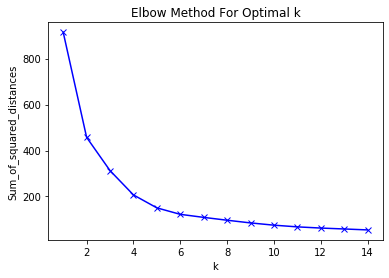

In [79]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans = kmeans.fit(combined_mod)
    Sum_of_squared_distances.append(kmeans.inertia_)
    
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

*__The best k is: 4.__*

# Clustering 1: k-Means

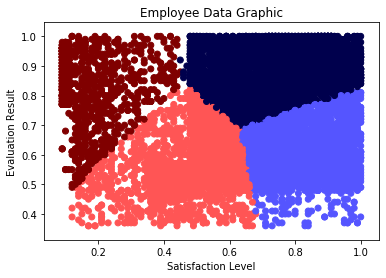

In [88]:
# from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(combined_mod)
plt.scatter(combined_mod['att1'],combined_mod['att2'], c=kmeans.labels_, cmap='seismic')
plt.xlabel("Satisfaction Level")
plt.ylabel("Evaluation Result")
plt.title("Employee Data Graphic")
plt.show()

att1 is satisfaction level 
(the higher the satisfaction level, the more satisfy a person does in his employment) 
att2 is evaluation result 
(the higher the evaluation result, the better/harder a person works in the company)

There are 4 clusters:
1. The hardworker with good satisfaction
2. The hardworker with bad satisfaction
3. The non-hardworker with good satisfaction
4. The non-hardworker with bad satisfaction

# Clustering 2: Hierarchical

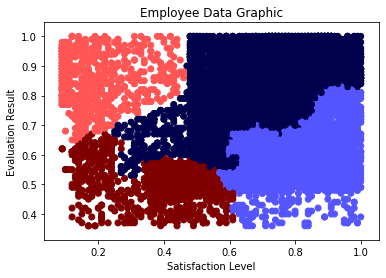

In [90]:
# from sklearn.cluster import AgglomerativeClustering
hrc = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
hrc.fit(combined_mod)
plt.scatter(combined_mod['att1'],combined_mod['att2'], c=hrc.labels_, cmap='seismic')
plt.xlabel("Satisfaction Level")
plt.ylabel("Evaluation Result")
plt.title("Employee Data Graphic")
plt.show()

att1 is satisfaction level 
(the higher the satisfaction level, the more satisfy a person does in his employment) 
att2 is evaluation result 
(the higher the evaluation result, the better/harder a person works in the company)

There are 4 clusters:
1. The hardworker with good satisfaction
2. The hardworker with bad satisfaction
3. The non-hardworker with good satisfaction
4. The non-hardworker with bad satisfaction

# Clustering 3: DBScan

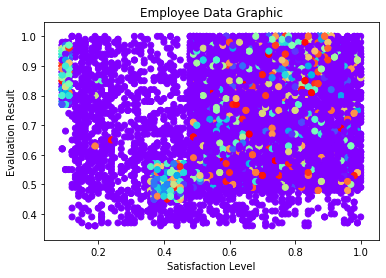

In [100]:
# from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.00000001)
db.fit(combined_mod)
plt.scatter(combined_mod['att1'],combined_mod['att2'], c=db.labels_, cmap='rainbow')
plt.xlabel("Satisfaction Level")
plt.ylabel("Evaluation Result")
plt.title("Employee Data Graphic")
plt.show()

The clusters above are not clearly seen.